In [2]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.datasets import mnist

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

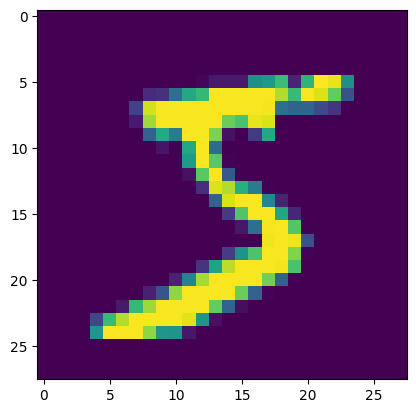

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
plt.imshow(X_train[0])
print(X_train[0])

In [5]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Here we are converting the data values in range of [0,1]
X_train /= 255
X_test /= 255

In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 10)
Y_test = tf.keras.utils.to_categorical(y_test, 10)


In [8]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile( loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001))
model.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 [==============================] - 108s 56ms/step - loss: 0.2145
Epoch 2/10
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0882
Epoch 3/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0699
Epoch 4/10
1875/1875 [==============================] - 99s 53ms/step - loss: 0.0576
Epoch 5/10
1875/1875 [==============================] - 98s 53ms/step - loss: 0.0497
Epoch 6/10
1875/1875 [==============================] - 101s 54ms/step - loss: 0.0409
Epoch 7/10
1875/1875 [==============================] - 97s 52ms/step - loss: 0.0379
Epoch 8/10
1875/1875 [==============================] - 98s 52ms/step - loss: 0.0342
Epoch 9/10
1875/1875 [==============================] - 96s 51ms/step - loss: 0.0320
Epoch 10/10
1875/1875 [==============================] - 87s 47ms/step - loss: 0.0301


In [9]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0285


In [10]:
model.predict(X_test)

313/313 [==============================] - 3s 9ms/step


array([[4.15055123e-14, 1.84087345e-09, 9.33176314e-10, ...,
        1.00000000e+00, 4.19981714e-12, 2.72899170e-09],
       [1.21968153e-14, 4.80583406e-10, 1.00000000e+00, ...,
        1.00413988e-15, 4.63721909e-15, 9.17773185e-18],
       [1.76847231e-10, 9.99999404e-01, 2.32371011e-09, ...,
        8.74582469e-08, 1.35765710e-08, 5.24080779e-09],
       ...,
       [5.57936813e-20, 1.84718948e-10, 8.29026382e-15, ...,
        2.76540544e-11, 4.04241485e-09, 2.47454262e-11],
       [3.62138857e-15, 1.10948255e-14, 1.14836475e-17, ...,
        5.26842085e-17, 1.22221904e-08, 5.38944618e-11],
       [6.42647394e-11, 6.18108952e-16, 5.31842853e-13, ...,
        5.09919134e-22, 2.08286392e-11, 7.30123978e-16]], dtype=float32)

In [11]:
score = model.evaluate(X_test, y_test, verbose = 0)
print('loss =', score)


loss = 0.02849184349179268


In [12]:
x_predict=model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,x_predict)
print('Accuracy:',accuracy)

313/313 [==============================] - 3s 9ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets